In [ ]:
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
from torch.nn.utils.prune import CustomFromMask
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import random
import matplotlib.pyplot as plt
import torchvision.models as models
import time
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import re

In [ ]:
import glob

In [ ]:
results_ap_l = list()
results_bp_l = list()
results_ap_masked_weights_l = list()
path = ''
files_all = glob.glob(path + "*.csv")
for filename in files_all:
  df = pd.read_csv(filename)
  if 'results_ap_df' in filename:
    results_ap_l.append(df)
  elif 'results_bp_df' in filename:
    results_bp_l.append(df)
  else:
    results_ap_masked_weights_l.append(df)

In [ ]:
results_ap = pd.concat(results_ap_l, axis=0, ignore_index=True)
results_bp = pd.concat(results_bp_l, axis=0, ignore_index=True)

In [ ]:
results_ap = pd.read_csv('results_ap_df_resnet_mnist_80perc.csv')

In [ ]:
results_bp = pd.read_csv('results_bp_df_resnet_mnist_80perc.csv')

In [ ]:
len(results_bp.columns)

22

In [ ]:
results_bp

,Unnamed: 0,model.conv1,model.layer1.0.conv1,model.layer1.0.conv2,model.layer1.1.conv1,model.layer1.1.conv2,model.layer2.0.conv1,model.layer2.0.conv2,model.layer2.0.downsample.0,model.layer2.1.conv1,...,model.layer3.0.conv2,model.layer3.0.downsample.0,model.layer3.1.conv1,model.layer3.1.conv2,model.layer4.0.conv1,model.layer4.0.conv2,model.layer4.0.downsample.0,model.layer4.1.conv1,model.layer4.1.conv2,model.fc
0,0,0.021051,0.014619,0.011898,0.008756,0.009447,0.009307,0.012968,0.027753,0.011106,...,0.017729,0.027496,0.011688,0.011984,0.017160,0.025199,0.030186,0.026888,0.022736,0.010058
1,1,0.016112,0.013538,0.010479,0.009483,0.009994,0.009543,0.011245,0.022839,0.010275,...,0.015505,0.027549,0.011979,0.013131,0.020883,0.026633,0.031158,0.026229,0.022145,0.012868
2,2,0.016536,0.010166,0.007586,0.007921,0.007920,0.006516,0.010685,0.017451,0.011352,...,0.015482,0.025590,0.014114,0.014034,0.019279,0.026737,0.029421,0.025089,0.021515,0.011544
3,3,0.014724,0.013823,0.009352,0.008808,0.007577,0.006948,0.007256,0.017891,0.007026,...,0.011074,0.017948,0.009135,0.009070,0.012919,0.019998,0.026126,0.023242,0.022824,0.012167
4,4,0.018162,0.016793,0.013745,0.009115,0.009085,0.010261,0.010864,0.022784,0.010422,...,0.015298,0.024070,0.014105,0.014338,0.018121,0.027667,0.027598,0.031763,0.025083,0.010206
5,5,0.014816,0.012514,0.009594,0.008500,0.009301,0.007603,0.011195,0.022248,0.011062,...,0.017650,0.030156,0.011543,0.012476,0.021128,0.028692,0.030174,0.023609,0.019338,0.011928


In [ ]:
results_bp = results_bp.drop(columns=['Unnamed: 0'])
results_ap = results_ap.drop(columns=['Unnamed: 0'])

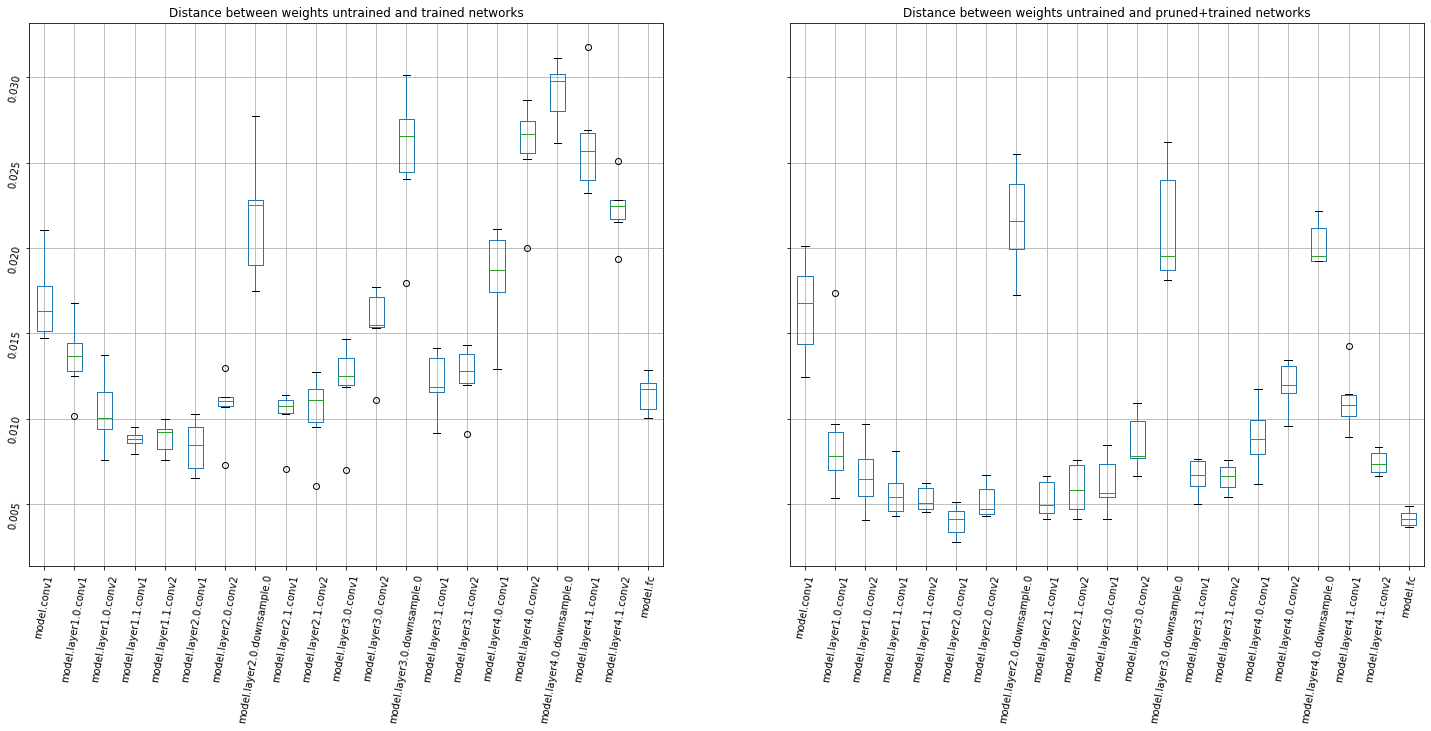

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(25,10))
results_bp.boxplot(ax = ax1)
results_ap.boxplot(ax = ax2)
ax1.title.set_text('Distance between weights untrained and trained networks')
ax2.title.set_text('Distance between weights untrained and pruned+trained networks')
ax1.tick_params(labelrotation=80)
ax2.tick_params(labelrotation=80)
# results_bp.plot(kind='box', color=dict(boxes='r', whiskers='r', medians='r', caps='r'))
# results_ap.plot(kind='box', color=dict(boxes='b', whiskers='b', medians='b', caps='b'))
#plt.xticks(rotation=-45)
#plt.title('Distance between weights untrained and trained networks')
plt.show()

In [ ]:
results_bp.columns[0]

'model.conv1'

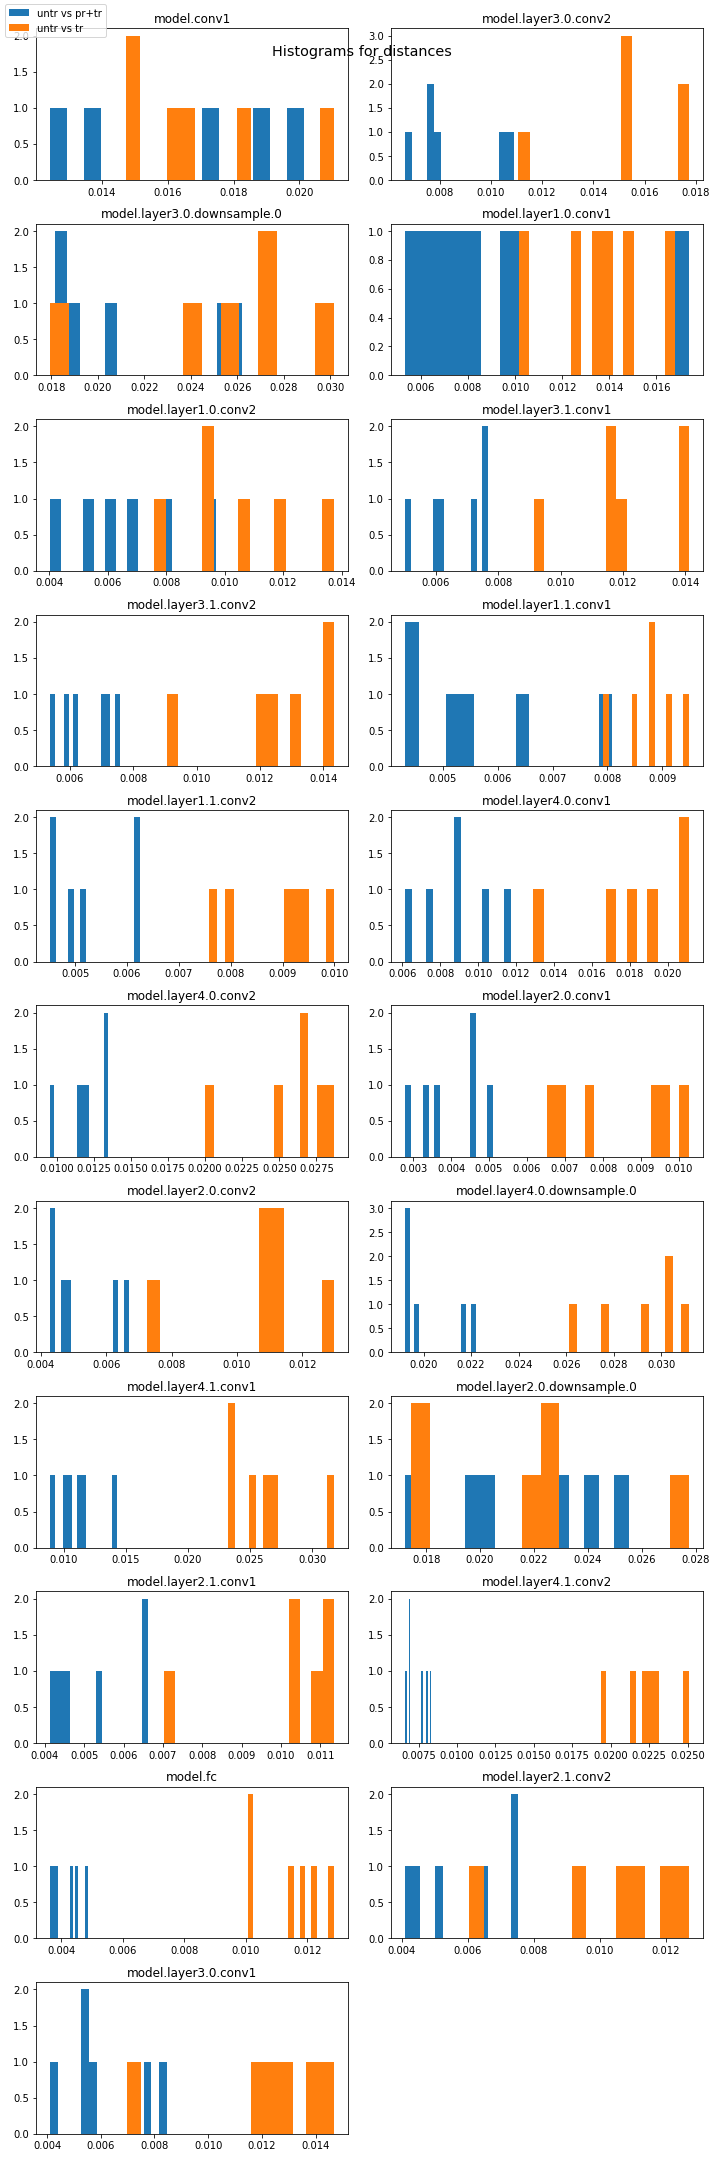

In [ ]:
fig, axs = plt.subplots(11, 2, figsize=(10,30))
for i in range(len(results_bp.columns)):
  axs[i%11, i%2].hist(results_ap.iloc[:, i], density=False, bins=15)
  axs[i%11, i%2].hist(results_bp.iloc[:, i], density=False, bins=15)
  axs[i%11, i%2].set_title(results_bp.columns[i])

if len(results_bp.columns)%2:
  axs.flat[-1].set_visible(False)

labels = ['untr vs pr+tr', 'untr vs tr']
fig.legend(labels, loc='upper left')
fig.suptitle('Histograms for distances', fontsize="x-large")

fig.tight_layout()